<a href="https://colab.research.google.com/github/MarioROT/IHLT-MAI/blob/main/Session7_MarioRosas_AlamLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 7 (Word Sequences) - IHLT

**Students:**
- Mario Rosas
- Alam Lopez

**Lab Professor:** Salvador Medina Herrera

## Paraphrases Template

In [1]:
%%shell
git clone https://github.com/mariorot/IHLT-MAI.git
cd 'IHLT-MAI'
mv 'complementary_material' /content/
mv scripts /content/
pip install svgling
pip install python-crfsuite

Cloning into 'IHLT-MAI'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 352 (delta 108), reused 74 (delta 43), pack-reused 190
Receiving objects: 100% (352/352), 303.97 KiB | 1.76 MiB/s, done.
Resolving deltas: 100% (198/198), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 6.0 MB/s eta 0:00:00


In [83]:
%load_ext autoreload
%autoreload 2

In [2]:
from scripts.compute_metrics import ComputeMetrics
from scripts.text_preprocessing import TextPreprocessing
from complementary_material.textserver import TextServer
from scripts.utils import pretty_table
from scipy.stats import pearsonr
import pandas as pd
pd.set_option("display.precision", 4)

[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


In [3]:
dt = pd.read_csv('complementary_material/test-gold/STS.input.SMTeuroparl.txt',sep='\t',header=None)
dt['gs'] = pd.read_csv('complementary_material/test-gold/STS.gs.SMTeuroparl.txt',sep='\t',header=None)

## TODO
1. Read all pairs of sentences of the SMTeuroparl files of test set within the evaluation framework of the project.

2. Compute their similarities by considering the following approach:

  - words plus NEs and Jaccard coefficient
  - ex: word_and_NEs=['John Smith', 'is', 'working']
  - Show the results.

Do you think it could be relevant to use NEs to compute the similarity between two sentences? Justify the answer.

In [4]:
import nltk
import svgling
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
sentence = "Mark Pedersen is working at Google since 1994."
res = nltk.ne_chunk(
        nltk.pos_tag(
          nltk.word_tokenize(sentence)))
type(res), res

(nltk.tree.tree.Tree,
 Tree('S', [Tree('PERSON', [('Mark', 'NNP')]), Tree('ORGANIZATION', [('Pedersen', 'NNP')]), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), Tree('ORGANIZATION', [('Google', 'NNP')]), ('since', 'IN'), ('1994', 'CD'), ('.', '.')]))

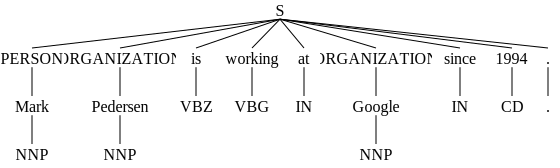

In [6]:
res

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [68]:
sentence = "Mark Pedersen works at Google since 1994."
doc = nlp(sentence)

[(token.text, token.pos_, token.tag_, token.lemma_, token.is_stop,
  token.ent_iob_, token.ent_type_) for token in doc]

[('Mark', 'PROPN', 'NNP', 'Mark', False, 'B', 'PERSON'),
 ('Pedersen', 'PROPN', 'NNP', 'Pedersen', False, 'I', 'PERSON'),
 ('works', 'VERB', 'VBZ', 'work', False, 'O', ''),
 ('at', 'ADP', 'IN', 'at', True, 'O', ''),
 ('Google', 'PROPN', 'NNP', 'Google', False, 'B', 'ORG'),
 ('since', 'SCONJ', 'IN', 'since', True, 'O', ''),
 ('1994', 'NUM', 'CD', '1994', False, 'B', 'DATE'),
 ('.', 'PUNCT', '.', '.', False, 'O', '')]

In [23]:
[(ent.text, ent.label_) for ent in doc.ents]

AttributeError: ignored

NameError: ignored

In [65]:
x=list(doc.ents)



In [74]:
def named_entities_data(sentence):
  doc = nlp(sentence if not isinstance(sentence, list) else ' '.join(sentence))
  entities=[entity.text for entity in doc.ents]
  not_entities=[word.text for word in doc if not any([ word.text in  entity.text for entity in doc.ents])]
  return entities+not_entities

In [88]:
tp = TextPreprocessing()
tp.named_entities_data(list(dt[0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


[['The',
  'leaders',
  'have',
  'now',
  'been',
  'given',
  'a',
  'new',
  'chance',
  'and',
  'let',
  'us',
  'hope',
  'they',
  'seize',
  'it',
  '.'],
 ['Amendment',
  'No',
  '7',
  'proposes',
  'certain',
  'changes',
  'in',
  'the',
  'references',
  'to',
  'paragraphs',
  '.'],
 ['Let',
  'me',
  'remind',
  'you',
  'that',
  'our',
  'allies',
  'include',
  'fervent',
  'supporters',
  'of',
  'this',
  'tax',
  '.'],
 ['today', '5.30 p.m.', 'The', 'vote', 'will', 'take', 'place', 'at'],
 ['The',
  'fishermen',
  'are',
  'inactive',
  ',',
  'tired',
  'and',
  'disappointed',
  '.'],
 ['House',
  'Article 272',
  'Neither',
  'was',
  'there',
  'a',
  'qualified',
  'majority',
  'within',
  'this',
  'to',
  'revert',
  'to',
  '.'],
 ['It',
  'increases',
  'the',
  'power',
  'of',
  'the',
  'big',
  'countries',
  'at',
  'the',
  'expense',
  'of',
  'the',
  'small',
  'countries',
  '.'],
 ['The',
  'fishermen',
  'are',
  'inactive',
  ',',
  'tired',


In [82]:
' '.join(sentence.split(" "))

'Mark Pedersen works at Google since 1994.'

In [67]:
list2+entities

['works', 'at', 'since', '.', 'Mark Pedersen', 'Google', '1994']

In [ ]:
help (doc)

In [13]:
spacy.displacy.render(doc, jupyter=True, style='ent')

In [11]:
with doc.retokenize() as retokenizer:
    tokens = [token for token in doc]
    for ent in doc.ents:
        retokenizer.merge(doc[ent.start:ent.end],
            attrs={"LEMMA": " ".join([tokens[i].text
                                for i in range(ent.start, ent.end)])})

[(token.text, token.pos_, token.tag_, token.lemma_, token.is_stop,
  token.ent_iob_, token.ent_type_) for token in doc]

[('Mark Pedersen', 'PROPN', 'NNP', 'Mark Pedersen', False, 'B', 'PERSON'),
 ('works', 'VERB', 'VBZ', 'work', False, 'O', ''),
 ('at', 'ADP', 'IN', 'at', True, 'O', ''),
 ('Google', 'PROPN', 'NNP', 'Google', False, 'B', 'ORG'),
 ('since', 'SCONJ', 'IN', 'since', True, 'O', ''),
 ('1994', 'NUM', 'CD', '1994', False, 'B', 'DATE'),
 ('.', 'PUNCT', '.', '.', False, 'O', '')]

In [14]:
ts = TextServer('MarioROT', 'IHLTMAI23*', 'entities')
# ts.entities("Mark Pedersen works at Google since 1994.")

In [15]:
ts = TextServer('MarioROT', 'IHLTMAI23*', 'tokenizer')

In [16]:
ts.tokenizer('Men want children. They get relaxed with kids.')

HTTPError: ignored

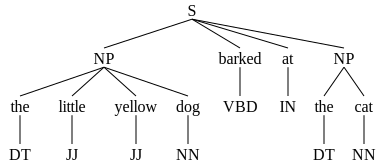

In [17]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"),\
            ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
cp.parse(sentence)

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


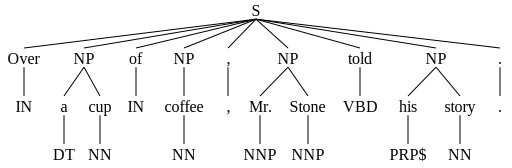

In [18]:
nltk.download('conll2000')
from nltk.corpus import conll2000

test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
sentence = conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99]
sentence

In [19]:
from nltk import tree2conlltags
tree2conlltags(sentence)

[('Over', 'IN', 'O'),
 ('a', 'DT', 'B-NP'),
 ('cup', 'NN', 'I-NP'),
 ('of', 'IN', 'O'),
 ('coffee', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('Mr.', 'NNP', 'B-NP'),
 ('Stone', 'NNP', 'I-NP'),
 ('told', 'VBD', 'O'),
 ('his', 'PRP$', 'B-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [20]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  59.7%%
    Precision:     45.3%%
    Recall:        24.2%%
    F-Measure:     31.6%%


In [21]:
nltk.download('treebank')
train = nltk.corpus.treebank.tagged_sents()[:3000]
test = nltk.corpus.treebank.tagged_sents()[3000:]
model = nltk.tag.CRFTagger()
model.train(train,'/content/crfTagger.mdl')
model.accuracy(test)

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


0.9474638463198791

In [ ]:
tagger = nltk.tag.CRFTagger()
tagger.set_model_file('crfTagger.mdl')
tagger.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

In [ ]:
train[0]

In [ ]:
tagger = nltk.tag.CRFTagger()
tagger.set_model_file('/content/drive/My Drive/models/crfTagger.mdl')
tagger.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

In [90]:
tp = TextPreprocessing()

# ----- Tokenization -----
# NLTK
dt[2] = tp.tokenize_data(list(dt[0]),'nltk')
dt[3] = tp.tokenize_data(list(dt[1]),'nltk')
# spaCy
dt[4] = tp.tokenize_data(list(dt[0]),'spacy')
dt[5] = tp.tokenize_data(list(dt[1]),'spacy')
# Data cleaning
dt[6]=tp.clean_data(list(dt[0]))
dt[7]=tp.clean_data(list(dt[1]))


# ----- Lemmatization -----
# -- With Tokens
# NLTK
dt[8]=tp.lemmatize_data(list(dt[0]),'nltk',False)
dt[9]=tp.lemmatize_data(list(dt[1]),'nltk',False)
# spaCy
dt[10]=tp.lemmatize_data(list(dt[0]),'spacy')
dt[11]=tp.lemmatize_data(list(dt[1]),'spacy')

# -- With Cleaned data
# NLTK
dt[12]=tp.lemmatize_data(list(dt[6]),'nltk')
dt[13]=tp.lemmatize_data(list(dt[7]),'nltk')
# spaCy
dt[14]=tp.lemmatize_data(list(dt[6]),'spacy')
dt[15]=tp.lemmatize_data(list(dt[7]),'spacy')


# ----- Word Desambiguation -----
# --- With Tokens
# NLTK
dt[16]= tp.wsd_lesk_data(list(dt[2]),'nltk', keep_failures=True, synset_word=True)
dt[17]= tp.wsd_lesk_data(list(dt[3]),'nltk', keep_failures=True, synset_word=True)
# Spacy
dt[18]= tp.wsd_lesk_data(list(dt[4]),'nltk', keep_failures=True, synset_word=True)
dt[19]= tp.wsd_lesk_data(list(dt[5]),'nltk', keep_failures=True, synset_word=True)
# Cleaned data
dt[20]= tp.wsd_lesk_data(list(dt[6]),'nltk', keep_failures=True, synset_word=True)
dt[21]= tp.wsd_lesk_data(list(dt[7]),'nltk', keep_failures=True, synset_word=True)

# --- With Lemmas
# NLTK Lemmas
dt[22]= tp.wsd_lesk_data(list(dt[8]),'nltk', keep_failures=True, synset_word=True)
dt[23]= tp.wsd_lesk_data(list(dt[9]),'nltk', keep_failures=True, synset_word=True)
# Spacy Lemmas
dt[24]= tp.wsd_lesk_data(list(dt[10]),'nltk', keep_failures=True, synset_word=True)
dt[25]= tp.wsd_lesk_data(list(dt[11]),'nltk', keep_failures=True, synset_word=True)
# Cleaned NLTK Lemmas
dt[26]= tp.wsd_lesk_data(list(dt[12]),'nltk', keep_failures=True, synset_word=True)
dt[27]= tp.wsd_lesk_data(list(dt[13]),'nltk', keep_failures=True, synset_word=True)
# Cleaned SpaCy Lemmas
dt[28]= tp.wsd_lesk_data(list(dt[14]),'nltk', keep_failures=True, synset_word=True)
dt[29]= tp.wsd_lesk_data(list(dt[15]),'nltk', keep_failures=True, synset_word=True)


# ----- Named Entities -----
# --- With Tokens
#SpaCy
dt[30]= tp.named_entities_data(list(dt[0]),'spacy')
dt[31]= tp.named_entities_data(list(dt[1]),'spacy')

# Cleaned SpaCy
dt[32]= tp.named_entities_data(list(dt[6]),'spacy')
dt[33]= tp.named_entities_data(list(dt[7]),'spacy')



The code for the tokenization is at: https://github.com/MarioROT/IHLT-MAI/blob/main/scripts/text_preprocessing.py

The code for jaccard distance computation is at: https://github.com/MarioROT/IHLT-MAI/blob/main/scripts/compute_metrics.py

In [91]:
# -- Jaccard computation
jaccard_pairs = {'jaccard_nltk_token':[2,3], 'jaccard_spacy_token':[4,5], 'jaccard_clean_token':[6,7], # Tokens
                 'jaccard_nltk_lemma':[8,9], 'jaccard_spacy_lemma':[10,11], 'jaccard_clean_nltk_lemma':[12,13], 'jaccard_clean_spacy_lemma':[14,15], # Lemmas
                 'jaccard_nltk_token_wsd':[16,17], 'jaccard_spacy_token_wsd':[18,19], 'jaccard_clean_token_wsd':[20,21], # WSD
                 'jaccard_nltk_lemma_wsd':[22,23], 'jaccard_spacy_lemma_wsd':[24,25], 'jaccard_clean_nltk_lemma_wsd':[26,27], 'jaccard_clean_spacy_lemma_wsd':[28,29], #WSD
                 'jaccard_spacy_token_ne':[30,31],  'jaccard_clean_token_ne':[32,33] #Named Entities

                 }

for name, values in jaccard_pairs.items():
  dt[name] = ComputeMetrics(dt[values].to_numpy(), ['jaccard'], 1).do()['jaccard']

Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...
Computing jaccard...


In [92]:
dt[['gs',*[col for col in dt.columns.to_list() if 'jaccard' in str(col)]]]

,gs,jaccard_nltk_token,jaccard_spacy_token,jaccard_clean_token,jaccard_nltk_lemma,jaccard_spacy_lemma,jaccard_clean_nltk_lemma,jaccard_clean_spacy_lemma,jaccard_nltk_token_wsd,jaccard_spacy_token_wsd,jaccard_clean_token_wsd,jaccard_nltk_lemma_wsd,jaccard_spacy_lemma_wsd,jaccard_clean_nltk_lemma_wsd,jaccard_clean_spacy_lemma_wsd,jaccard_spacy_token_ne,jaccard_clean_token_ne
0,4.500,0.6538,0.6538,0.6923,0.6538,0.6000,0.6667,0.6667,0.7037,0.7037,0.6923,0.7500,0.6538,0.6923,0.6923,0.6538,0.6923
1,5.000,0.2143,0.2143,0.2857,0.0769,0.0769,0.0000,0.0000,0.0769,0.0769,0.0000,0.0769,0.0769,0.0000,0.0000,0.2143,0.2857
2,4.250,0.6087,0.6087,0.7273,0.6087,0.5455,0.7273,0.7273,0.6087,0.6087,0.7273,0.6087,0.5455,0.7273,0.7273,0.6087,0.7273
3,4.500,0.4545,0.4000,0.2500,0.4545,0.4000,0.2500,0.2500,0.4545,0.4000,0.2500,0.4545,0.4000,0.2500,0.2500,0.3333,0.2500
4,5.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,5.000,0.4500,0.4500,0.6364,0.4500,0.4500,0.6364,0.6364,0.5909,0.5909,0.6364,0.5909,0.5909,0.6364,0.6364,0.4500,0.6364
455,4.750,0.6429,0.7143,0.2500,0.6429,0.6154,0.2500,0.2500,0.5385,0.6154,0.2500,0.5385,0.8000,0.2500,0.2500,0.6923,0.2500
456,5.000,0.6000,0.6000,0.6667,0.6000,0.5263,0.6667,0.6667,0.6000,0.6000,0.6667,0.5263,0.5263,0.6667,0.6667,0.6316,0.6667
457,4.000,0.6818,0.6818,0.8000,0.6818,0.6190,0.8000,0.8000,0.6818,0.6818,0.8000,0.6818,0.6190,0.8000,0.8000,0.6818,0.8000


In [93]:
pearson_group = lambda group: [round(pearsonr(dt['gs'], 1-dt[column])[0], 3) for column in dt.columns if group == str(column).split('_')[-1]]
names_group = lambda group: [' '.join(column.split('_')[1:-1]).upper() for column in dt.columns if group == str(column).split('_')[-1]]

results = {'Tokenization': {'Category':names_group('token'),'Values':pearson_group('token')},
           'Lemmatization': {'Category':names_group('lemma'), 'Values':pearson_group('lemma')},
           'Word Sense Disambiguation': {'Category':names_group('wsd'), 'Values':pearson_group('wsd')},
           'Named Entities': {'Category':names_group('ne'), 'Values':pearson_group('ne')}}

for name, dic in results.items():
  pretty_table(dic, name)


--- Results for Tokenization
+----------+--------+
| Category | Values |
+----------+--------+
|   NLTK   |  0.45  |
|  SPACY   | 0.461  |
|  CLEAN   | 0.468  |
+----------+--------+

--- Results for Lemmatization
+-------------+--------+
|   Category  | Values |
+-------------+--------+
|     NLTK    | 0.449  |
|    SPACY    | 0.477  |
|  CLEAN NLTK | 0.481  |
| CLEAN SPACY | 0.491  |
+-------------+--------+

--- Results for Word Sense Disambiguation
+-------------------+--------+
|      Category     | Values |
+-------------------+--------+
|     NLTK TOKEN    |  0.42  |
|    SPACY TOKEN    | 0.429  |
|    CLEAN TOKEN    |  0.48  |
|     NLTK LEMMA    | 0.417  |
|    SPACY LEMMA    | 0.422  |
|  CLEAN NLTK LEMMA | 0.482  |
| CLEAN SPACY LEMMA | 0.493  |
+-------------------+--------+

--- Results for Named Entities
+-------------+--------+
|   Category  | Values |
+-------------+--------+
| SPACY TOKEN | 0.427  |
| CLEAN TOKEN | 0.456  |
+-------------+--------+


# Conclusion

In this lab session excercise, we compared previous sentence pairs using Jaccard distance with and without lemmatization and data cleaning. And now with the Word Sense Desambiguation process, using both the "raw" lemmas and the lemmas with a previous data cleaning.

We can see in the table above that even if it is counter-intuitive the results of the pearson correlation between the previous lab (lemmas and words) outperformed the ones with the WSD both with words and lemmas, and with and without the data cleaning process.


